<a href="https://colab.research.google.com/github/conextm/python/blob/main/M1_Actividad_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contexto A

partir del trabajo que su equipo ha desarrollado en la Contraloría General de la República en relación con el Ministerio de Salud, la dirección de analítica de datos le ha solicitado que continúe con el proceso exploratorio en el marco del Informe de Avance Fiscal. Como parte de algunas revisiones selectas de entidades públicas, en esta ocasión, le han suministrado datos de la Alcaldía Mayor de Bogotá. Como mínimo, usted puede replicar el análisis desarrollado para el Ministerio de Salud con los datos de la Alcaldía de Bogotá. Con estos, la idea es entender mejor la forma en que la Alcaldía celebra sus contratos, de manera que se pueda publicar un informe que motive conversaciones al respecto. Recuerde que no hay restricciones respecto a los análisis que puede generar. Si considera que requiere generar gráficos o estadísticos que sean de interés, y está en la capacidad de hacerlos, es libre de presentarlos. Si aún no está en capacidad de hacerlos, puede proponerlos, resaltando cuáles son las preguntas que quiere responder con ellos. Lo que le convierte en un analista de datos es que dialogue con la información, le hace preguntas y reflexiona sobre ella; generar y ejecutar programas es solo la forma de hacerlo y los siguientes tres módulos de este curso son el espacio para desarrollar esas habilidades



## Diccionario de datos

|Variable|Descripción
|---|---|
|Nombre Entidad|Nombre de la Entidad que realiza la contratación.|
|Nit Entidad|NIT de la Entidad que realiza la contratación.|
|Departamento|Departamento de la Entidad que realiza la contratación.|
|Localización|Ubicación de la Entidad que realiza la contratación.|
|Orden|Define si la Entidad es de Orden Territorial o Nacional.|
|Sector|Sector de la Entidad.|
|Proceso de Compra|Código del proceso precontractual que asigna la plataforma SECOP II.|
|ID Contrato|Código del contrato asignado por la plataforma SECOP II.|
|Referencia del Contrato|Código del contrato asignado por la Entidad (Este código se puede repetir entre entidades, pero en teoría no se debería repetir dentro de la misma entidad).|
|Estado Contrato|Etapa en la que se encuentra el contrato o estado en el que cerró.|
|Codigo de Categoria Principal|Código del bienes y servicios de las Naciones Unidas que agrupa y clasifica el objeto a contratar.|
|Descripcion del Proceso|Descripción de la entidad sobre el objeto, bien o servicio a contratar.|
|Tipo de Contrato|Tipo contrato realizado.|
|Modalidad de Contratacion|Modalidad de contratación por la cual se realiza el proceso.|
|Justificacion Modalidad de Contratacion|Justificación de la modalidad de contratación.|
|Fecha de Firma|Fecha en la que se firma el contrato (formato MM/DD/AAAA).|
|Año Firma|Año de la firma del contrato.|
|TipoDocProveedor|Tipo de documento del proveedor, puede ser NIT, CC, entre otros.|
|Documento Proveedor|Número de documento del proveedor.|
|Proveedor Adjudicado|Nombre del proveedor.|
|Es Grupo|Muestra si el proveedor es un grupo temporal de varios proveedores. Incluye, uniones temporales, consorcios, entre otros.|
|Es Pyme|Indica si el proveedor es MiPymes.|
|Valor del Contrato|Valor final del contrato.|
|Nombre Representante Legal|Nombre del representante legal del proveedor. En caso de ser una persona natural, debería ser la misma información que el nombre del proveedor.|
|Tipo de Identificación Representante Legal|Tipo de documento que identifica al representante legal.|
|Identificación Representante Legal|Identificación del representante legal.|
|Género Representante Legal|Género del representante legal.|



### Preparación

In [ ]:
from google.colab import drive # conectar con google drive
from google.colab import files # cargar archivos
import pandas as pd # manejo de data frames
import seaborn as sns # visualización
import matplotlib.pyplot as plt
import numpy as np #
import io
import scipy.stats # distribuciones estadísticas


In [ ]:
### Carga de datos
uploaded = files.upload()

Saving AlcaldiaBogota_2017_2019.xlsx to AlcaldiaBogota_2017_2019 (5).xlsx


In [ ]:
# La base la nombramos df
df = pd.read_excel(io.BytesIO(uploaded['AlcaldiaBogota_2017_2019 (5).xlsx']))

In [ ]:
# Visualización de la base de datos
display(df)

,Nombre Entidad,Nit Entidad,Departamento,Localización,Orden,Sector,Proceso de Compra,ID Contrato,Referencia del Contrato,Estado Contrato,...,TipoDocProveedor,Documento Proveedor,Proveedor Adjudicado,Es Grupo,Es Pyme,Valor del Contrato,Nombre Representante Legal,Tipo de Identificación Representante Legal,Identificación Representante Legal,Género Representante Legal
0,SECRETARIA DISTRITAL DE DESARROLLO ECONOMICO ...,8999990619,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Industria,CO1.BDOS.183816,CO1.PCCNTR.199403,270 DE 2017,Modificado,...,No Definido,No Definido,Consorcio MPC,Si,No,1939960439,Sin Descripcion,Sin Descripcion,Sin Descripcion,No Definido
1,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,CO1.BDOS.218629,CO1.PCCNTR.206713,CO1.PCCNTR.206713,Activo,...,Cédula de Ciudadanía,79156673,HECTOR JAVIER BARROTES CONTRERAS,No,No,27335835,Hector Javier Barrotes Contreras,Sin Descripcion,79156673,No Definido
2,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,CO1.BDOS.218221,CO1.PCCNTR.206103,4233000-724-2017,Activo,...,Cédula de Ciudadanía,13740086,Pedro Alfonso Sarmiento Bernal,No,No,17573037,Pedro Alfonso Sarmiento Bernal,Sin Descripcion,13740086,No Definido
3,SECRETARIA DISTRITAL DE DESARROLLO ECONOMICO ...,8999990619,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Industria,CO1.BDOS.220005,CO1.PCCNTR.207420,291 de 2017,Cerrado,...,No Definido,830137690,BOGOTA Y CUNDINAMARCA CONVENTION BUREAU,No,Si,13297334,SANDRA PATRICIA GARCIA GIRALDO,Sin Descripcion,43277983,No Definido
4,SECRETARIA DISTRITAL DE DESARROLLO ECONOMICO ...,8999990619,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Industria,CO1.BDOS.199726,CO1.PCCNTR.203214,302,terminado,...,No Definido,900497610,FAMA Consultores SAS,No,Si,86539299,WINSTON ALBERTO MONTES ALVAREZ,Sin Descripcion,15043065,No Definido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,CO1.BDOS.961218,CO1.PCCNTR.1207340,4232000-1042-2019,Activo,...,No Definido,900758826,DISTRIBUCIONES BOGOTÀ,No,Si,28599897,JAIME EDUARDO DIAZ BARRERA,Sin Descripcion,80058064,No Definido
1355,SECRETARIA DISTRITAL DE DESARROLLO ECONOMICO ...,8999990619,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Industria,CO1.BDOS.962310,CO1.PCCNTR.1207406,403-2019,terminado,...,No Definido,900260048,ITSEC SAS,No,Si,74021000,Diana Marcela Avendaño Tejedor,Sin Descripcion,52789505,No Definido
1356,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,CO1.BDOS.970418,CO1.PCCNTR.1220110,4204000-1096-2019,Activo,...,No Definido,830505521,STS SAS,No,Si,152000000,Mauricio Amaya Amezquita,Sin Descripcion,Sin Descripcion,No Definido
1357,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,CO1.BDOS.971123,CO1.PCCNTR.1219405,4204000-1097-2019,Activo,...,No Definido,830044977,XSYSTEM LTDA,No,No,131588000,Weimar Garcia Cuellar,Sin Descripcion,79687935,No Definido


### Caracterización y exploración

Hagamos una exploración inicial de los datos con algunos métodos de Pandas.

Con esto podemos tener una mejor idea de los datos que tenemos y la calidad de la información.

**¿Cuantas filas y columnas tiene la base de datos?**

In [ ]:
print('Filas: ', df.shape[0])
print('Columnas: ', df.shape[1])

Filas:  10
Columnas:  2


**Validemos nuestras variables de acuerdo al diccionario de datos:**

In [ ]:
df.columns

Index(['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Localización',
       'Orden', 'Sector', 'Proceso de Compra', 'ID Contrato',
       'Referencia del Contrato', 'Estado Contrato',
       'Codigo de Categoria Principal', 'Descripcion del Proceso',
       'Tipo de Contrato', 'Modalidad de Contratacion',
       'Justificacion Modalidad de Contratacion', 'Fecha de Firma',
       'Año Firma', 'TipoDocProveedor', 'Documento Proveedor',
       'Proveedor Adjudicado', 'Es Grupo', 'Es Pyme', 'Valor del Contrato',
       'Nombre Representante Legal',
       'Tipo de Identificación Representante Legal',
       'Identificación Representante Legal', 'Género Representante Legal'],
      dtype='object')

**¿Cuales son los tipos de datos que tenemos en nuestra base de datos?**

La función `df.info()` nos permite conocer el tipo de dato en el que es cargado la base y adicional conocer si existen datos nulos en alguna de las variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Nombre Entidad                              1359 non-null   object        
 1   Nit Entidad                                 1359 non-null   int64         
 2   Departamento                                1359 non-null   object        
 3   Localización                                1359 non-null   object        
 4   Orden                                       1359 non-null   object        
 5   Sector                                      1359 non-null   object        
 6   Proceso de Compra                           1359 non-null   object        
 7   ID Contrato                                 1359 non-null   object        
 8   Referencia del Contrato                     1359 non-null   object        
 9   Estado C

Con lo anterior, todas las variables tienen datos. Y tenemos variables de tipo categorico, decimal, entero y fecha.

... Otra manera de conocer los tipos de datos...

In [ ]:
df.dtypes

Nombre Entidad                                        object
Nit Entidad                                            int64
Departamento                                          object
Localización                                          object
Orden                                                 object
Sector                                                object
Proceso de Compra                                     object
ID Contrato                                           object
Referencia del Contrato                               object
Estado Contrato                                       object
Codigo de Categoria Principal                         object
Descripcion del Proceso                               object
Tipo de Contrato                                      object
Modalidad de Contratacion                             object
Justificacion Modalidad de Contratacion               object
Fecha de Firma                                datetime64[ns]
Año Firma               

In [ ]:
cualicolumns=df.select_dtypes(exclude=['int64','float64','datetime64']).columns
cuanticolumns=df.select_dtypes(exclude=['object','datetime64']).columns
fechacolumns=df.select_dtypes(exclude=['object','float64','int64']).columns

In [ ]:
print('El número de variables categóricas es de: ', len(cualicolumns)),
print('El número de variables cuantitativas es de: ', len(cuanticolumns)),
print('El número de variables tipo fecha es de: ', len(fechacolumns))

El número de variables categóricas es de:  23
El número de variables cuantitativas es de:  4
El número de variables tipo fecha es de:  1


La función `df.head()` nos permite visualizar los 5 primeros registros por defecto y la función `df.tail()` los últimos 5 registros.

**-Pruebe las funciones anteriormente mencionadas**

**-Después de conocer los tipos de datos cargados en python y la visualización de las variables. Clasifique los tipos de datos de cada variable entre a.Cualitativa (Nominales, Ordinales) b.Cuantitativa (Discretas, Continuas)**

In [ ]:
df.head()
df.tail()

,Nombre Entidad,Nit Entidad,Departamento,Localización,Orden,Sector,Proceso de Compra,ID Contrato,Referencia del Contrato,Estado Contrato,...,Documento Proveedor,Proveedor Adjudicado,Es Grupo,Es Pyme,Valor del Contrato,Nombre Representante Legal,Tipo de Identificación Representante Legal,Identificación Representante Legal,Género Representante Legal,log_variable
1354,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,CO1.BDOS.961218,CO1.PCCNTR.1207340,4232000-1042-2019,Activo,...,900758826,DISTRIBUCIONES BOGOTÀ,No,Si,28599897,JAIME EDUARDO DIAZ BARRERA,Sin Descripcion,80058064,No Definido,7.46
1355,SECRETARIA DISTRITAL DE DESARROLLO ECONOMICO ...,8999990619,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Industria,CO1.BDOS.962310,CO1.PCCNTR.1207406,403-2019,terminado,...,900260048,ITSEC SAS,No,Si,74021000,Diana Marcela Avendaño Tejedor,Sin Descripcion,52789505,No Definido,7.87
1356,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,CO1.BDOS.970418,CO1.PCCNTR.1220110,4204000-1096-2019,Activo,...,830505521,STS SAS,No,Si,152000000,Mauricio Amaya Amezquita,Sin Descripcion,Sin Descripcion,No Definido,8.18
1357,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,CO1.BDOS.971123,CO1.PCCNTR.1219405,4204000-1097-2019,Activo,...,830044977,XSYSTEM LTDA,No,No,131588000,Weimar Garcia Cuellar,Sin Descripcion,79687935,No Definido,8.12
1358,SECRETARIA DISTRITAL DE DESARROLLO ECONOMICO ...,8999990619,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Industria,CO1.BDOS.964905,CO1.PCCNTR.1211928,405-2019,Suspendido,...,900776369,BIOPROYECTAR SAS,No,Si,252485217,Mario Fernando Contreras Ortiz,Sin Descripcion,80720118,No Definido,8.40


**Resumen de los datos númericos**
La función `df.describe()` nos permite conocer un resumen de los datos númericos.

In [ ]:
# Esto lo ejecutamos para visualizar los valores númericos sin notación cientifica
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.describe()

,Nit Entidad,Año Firma,Valor del Contrato,log_variable
count,1359.00,1359.00,1359.00,1359.00
mean,3486751331.91,2018.60,175398530.85,7.49
std,3777814977.16,0.52,977909203.37,1.04
min,899999061.00,2017.00,0.00,0.00
25%,899999061.00,2018.00,16542072.00,7.22
50%,899999061.00,2019.00,38356920.00,7.58
75%,8999990619.00,2019.00,79213097.00,7.90
max,8999990619.00,2019.00,17125271252.00,10.23


**Analicemos**

Aunque los otros valores son cargados como tipo númerico no son objeto de análisis de medidas de tendencia central, esto dado que, son identificadores y años.

El valor promedio de los contratos que realiza la alcaldia de Bogotá es de 175.398 millones de pesos.  De manera análoga el percentil 50 o el 50% de los datos de los valores del contrato se encuentran por encima de $38.357 millones de pesos.

Existe uno o varios contratos con valor 0 y existe uno o varios contratos que superan el valor de $17,125.27 miles de millones de pesos.

Los datos se encuentran dispersos con relación a la media en aproximadamente 977 millones de pesos.


**¿Que más puede decir del valor del contrato?**

Los datos representan un total de 1359 contratos entre los años 2017 y 2019. El valor de la desviación estándar representa la variabilidad de los datos. En este caso, un valor alto de este parámetro indica una dispersión grande de los datos con respecto a la media.

Teniendo en cuenta que los datos están dispersos con respecto a la media, también se pueden observar valores atípicos. Por ende, se puede predecir que la distribución de los datos no es normal.

**Histograma de la variable Valor del contrato**

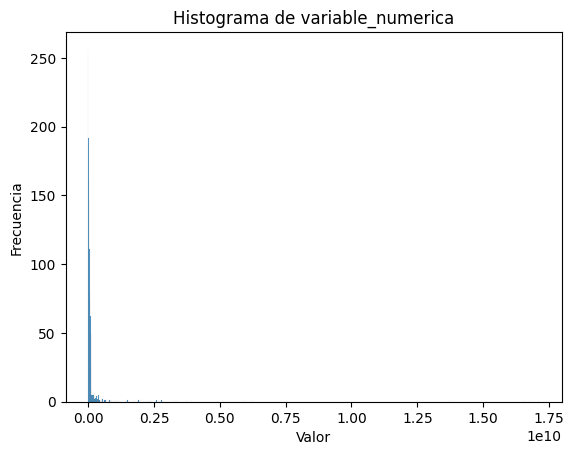

In [ ]:
# Crea un histograma de la variable_numerica con seaborn
sns.histplot(df['Valor del Contrato'], kde=False)

# Agrega un título y etiquetas a los ejes
plt.title('Histograma de variable_numerica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Muestra el histograma
plt.show()

**Histograma de la variable Valor del contrato, Logaritmo base 10**

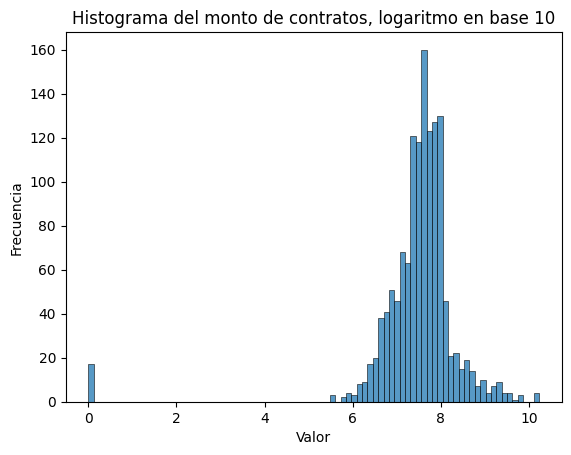

In [ ]:
# Extraemos el logaritmo en base 10 al valor del contrato
df['log_variable'] = np.log10(df['Valor del Contrato']+1)
sns.histplot(df['log_variable'], kde=False)

# Agrega un título y etiquetas a los ejes
plt.title('Histograma del monto de contratos, logaritmo en base 10')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Muestra el histograma
plt.show()

**Con la gráfica anterior, ¿lo puede asociar a alguna distribución conocida en clase?**

La distribución representada es asimétrica sesgada a la izquierda debido a los valores de contratos iguales a 0. El sesgo negativo se debe a que los valores extremadamente bajos, en este caso los contratos con valor cero, están desplazando la media hacia la izquierda.

Este tipo de sesgo puede tener un impacto significativo en el análisis de datos y en la interpretación de resultados. Es importante considerar la presencia de estos valores atípicos, ya que pueden afectar las conclusiones que se extraen de los datos y las decisiones basadas en ellos. Dependiendo del contexto, es posible que sea necesario tomar medidas para abordar los valores atípicos o considerar métodos estadísticos robustos que sean menos sensibles a la presencia de estos datos extremadamente bajos.

**Descripción de las variables categóricas**

In [ ]:
df.describe(include=["O"])

,Nombre Entidad,Departamento,Localización,Orden,Sector,Proceso de Compra,ID Contrato,Referencia del Contrato,Estado Contrato,Codigo de Categoria Principal,...,Justificacion Modalidad de Contratacion,TipoDocProveedor,Documento Proveedor,Proveedor Adjudicado,Es Grupo,Es Pyme,Nombre Representante Legal,Tipo de Identificación Representante Legal,Identificación Representante Legal,Género Representante Legal
count,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,...,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359
unique,2,1,1,1,2,1324,1359,1357,6,256,...,16,4,1070,1088,2,2,1049,2,1033,2
top,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,CO1.BDOS.497222,CO1.PCCNTR.199403,4120000-393-2019,Modificado,V1.80111620,...,ServiciosProfesionales,Cédula de Ciudadanía,No Definido,Empresa de Telecomunicaciones de Bogota ETB SA...,No,No,Sin Descripcion,Sin Descripcion,Sin Descripcion,No Definido
freq,925,1359,1359,1359,925,8,1,2,792,212,...,977,978,18,7,1336,1090,51,1354,75,1354


**Recuerde que con df.value_counts() puede generar distribuciones de las variables**

In [ ]:
df['Es Pyme'].value_counts() # Puede probar las distribuciones por otras variables

No    1090
Si     269
Name: Es Pyme, dtype: int64

In [ ]:
# Frecuencia (% de participación)
df['Es Pyme'].value_counts()/len(df)*100

No   80.21
Si   19.79
Name: Es Pyme, dtype: float64

In [ ]:
df['Es Grupo'].value_counts() # Puede probar las distribuciones por otras variables

No    1336
Si      23
Name: Es Grupo, dtype: int64

In [ ]:
# Frecuencia (% de participación)
df['Es Grupo'].value_counts()/len(df)*100

No   98.31
Si    1.69
Name: Es Grupo, dtype: float64

**Para poder ver variables de interés puede modificar o incluir las variables dentro del corchete cuadrado**

In [ ]:
df_describe = df[['Sector','Estado Contrato','Tipo de Contrato']].describe(include='O')
print(df_describe)

                  Sector Estado Contrato         Tipo de Contrato
count               1359            1359                     1359
unique                 2               6                       11
top     Servicio Público      Modificado  Prestación de servicios
freq                 925             792                     1082


In [ ]:
df['Sector'].value_counts()

No    98.307579
Si     1.692421
Name: Es Grupo, dtype: float64

In [ ]:
df['Sector'].value_counts()/len(df)*100

Servicio Público    68.064753
Industria           31.935247
Name: Sector, dtype: float64

In [ ]:
df['Tipo de Contrato'].value_counts()

Prestación de servicios       1082
Compraventa                     93
Otro                            85
Consultoría                     31
Suministros                     26
Arrendamiento de inmuebles      23
Obra                             7
Interventoría                    7
Seguros                          3
Acuerdo de cooperación           1
Comisión                         1
Name: Tipo de Contrato, dtype: int64

In [ ]:
df['Tipo de Contrato'].value_counts()/len(df)*100

Prestación de servicios       79.617366
Compraventa                    6.843267
Otro                           6.254599
Consultoría                    2.281089
Suministros                    1.913171
Arrendamiento de inmuebles     1.692421
Obra                           0.515085
Interventoría                  0.515085
Seguros                        0.220751
Acuerdo de cooperación         0.073584
Comisión                       0.073584
Name: Tipo de Contrato, dtype: float64

In [ ]:
df['Estado Contrato'].value_counts()

Modificado    792
Activo        290
terminado     214
Cerrado        44
cedido         17
Suspendido      2
Name: Estado Contrato, dtype: int64

In [ ]:
df['Estado Contrato'].value_counts()/len(df)*100

Modificado    58.278146
Activo        21.339220
terminado     15.746873
Cerrado        3.237675
cedido         1.250920
Suspendido     0.147167
Name: Estado Contrato, dtype: float64

**¿Qué puede analizar con los resultados anteriores?**

Es Pyme (Es una Pequeña o Mediana Empresa):
- No: 1090 empresas
- Sí: 269 empresas
- Porcentaje de No Pymes: 80.21%
- Porcentaje de Pymes: 19.79%

Este conjunto de datos contiene información sobre cada empresa clasificada como una Pequeña o Mediana Empresa (Pyme) o no. Los datos muestran que la mayoría de las empresas 80.21% no son clasificadas como Pymes, mientras que solo el 19.79% entran en la categoría de Pyme.

Es Grupo (Pertenece a un Grupo):
- No: 1336 empresas
- Sí: 23 empresas
- Porcentaje de No Grupos: 98.31%
- Porcentaje de Grupos: 1.69%

Este conjunto de datos contiene información sobre si cada empresa forma parte de un grupo o no. Los datos muestran que la mayoría de las empresas con un porcentaje del 98.31% no pertenecen a ningún grupo, mientras que solo el 1.69% son parte de un grupo.

A continuación, tenemos datos relacionados con los sectores de las empresas:

- Servicio Público: 925 empresas
- Industria: 434 empresas
- Porcentaje servicio público: 68.06%
- Porcentaje industria: 31,94%

Este conjunto de datos proporciona información sobre la distribución de las empresas en diferentes sectores. La mayoría de las empresas se encuentran en el sector de Servicio Público 925 empresas (68.06%), mientras que un número menor se encuentra en el sector de Industria 434 empresas (31,94%).

Continuando, hay datos sobre el tipo de contratos:

- Prestación de servicios: 1082 empresas
- Compraventa: 93 empresas
- Otro: 85 empresas
- Consultoría: 31 empresas
- Suministros: 26 empresas
- Arrendamiento de inmuebles: 23 empresas
- Obra: 7 empresas
- Interventoría: 7 empresas
- Seguros: 3 empresas
- Acuerdo de cooperación: 1 empresa
- Comisión: 1 empresa

Porcentaje:
- Prestación de servicios       79.617366%
- Compraventa                    6.843267%
- Otro                           6.254599%
- Consultoría                    2.281089%
- Suministros                    1.913171%
- Arrendamiento de inmuebles     1.692421%
- Obra                           0.515085%
- Interventoría                  0.515085%
- Seguros                        0.220751%
- Acuerdo de cooperación         0.073584%
- Comisión                       0.073584%

Este conjunto de datos ofrece información sobre los tipos de contratos en los que están involucradas las empresas. El tipo de contrato más común es "Prestación de servicios", con 1082 empresas utilizando este tipo de contrato. "Compraventa" y "Otro" también son tipos de contrato relativamente comunes, mientras que otros tienen menos ocurrencias.

Finalmente, tenemos datos sobre el estado de los contratos:

- Modificado: 792 contratos
- Activo: 290 contratos
- Terminado: 214 contratos
- Cerrado: 44 contratos
- Cedido: 17 contratos
- Suspendido: 2 contratos

Porcentaje:
- Modificado    58.278146%
- Activo        21.339220%
- terminado     15.746873%
- Cerrado        3.237675%
- cedido         1.250920%
- Suspendido     0.147167%

Este conjunto de datos proporciona información sobre el estado actual de los contratos. Modificado es el estado de contrato más común con un 58.27%, seguido de Activo 21.33% y Terminado 15.74%. Los estados Cerrado, Cedido y Suspendido tienen menos ocurrencias.

En resumen, estos conjuntos de datos ofrecen información valiosa sobre la clasificación de las empresas como Pymes o grupos, su distribución en diferentes sectores, los tipos de contratos en los que participan y el estado actual de sus contratos. **texto en negrita**

**Boxplot del valor de contrato vs Tipo de contrato**

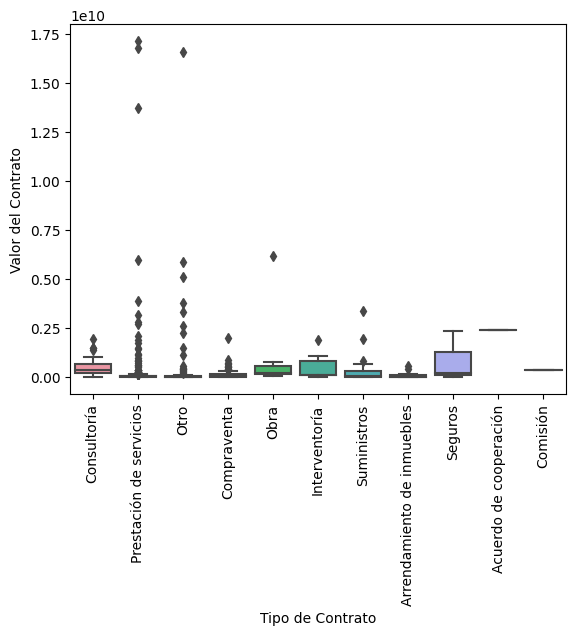

<Figure size 500x600 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df)

# Gira los labels del eje x
plt.xticks(rotation=90)
plt.figure(figsize=(5,6))
# Muestra el boxplot

plt.show()

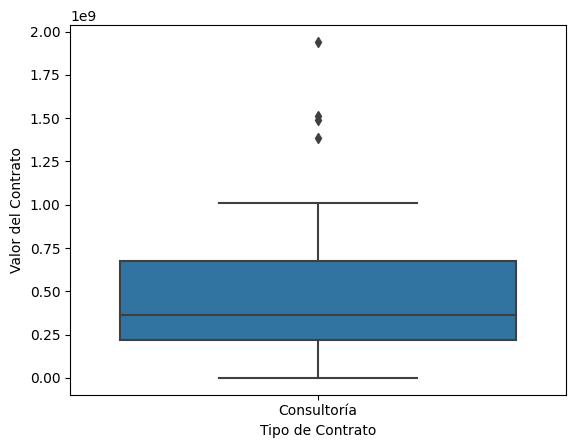

<Figure size 500x600 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Consultoría'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(5,6))
# Muestra el boxplot

plt.show()

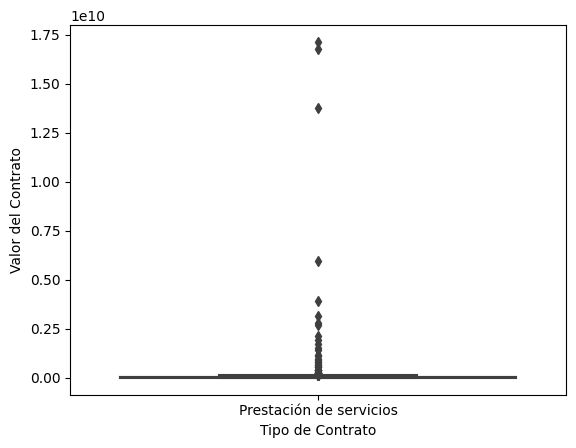

<Figure size 500x600 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Prestación de servicios'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(5,6))
# Muestra el boxplot

plt.show()

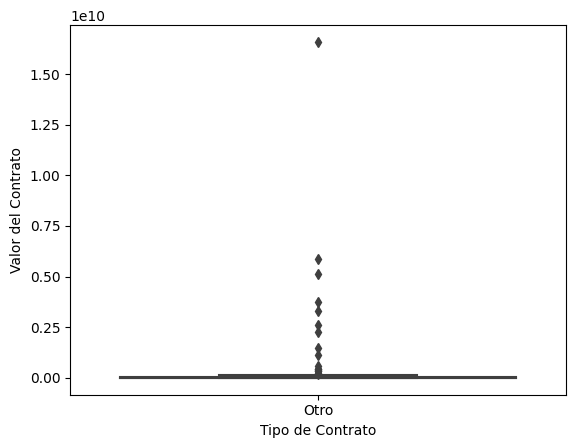

<Figure size 500x600 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Otro'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(5,6))
# Muestra el boxplot

plt.show()

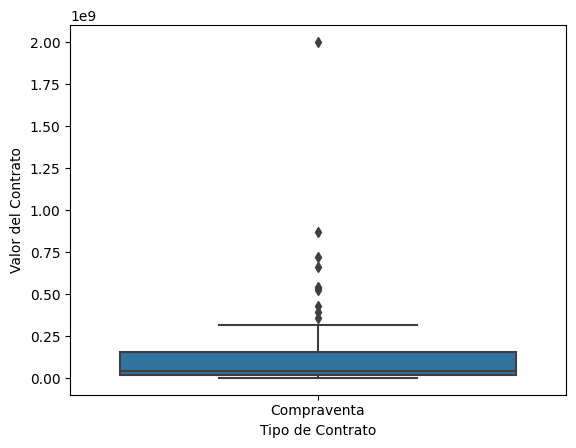

<Figure size 500x600 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Compraventa'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(5,6))
# Muestra el boxplot

plt.show()

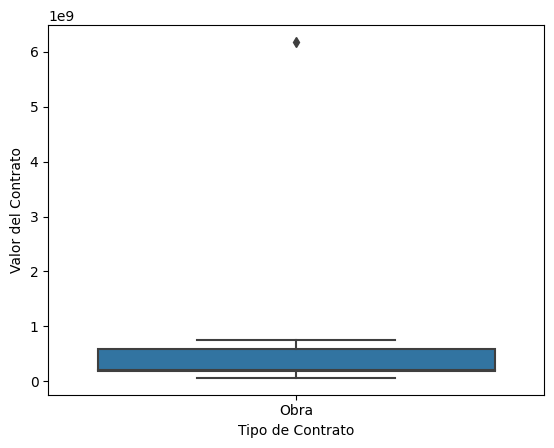

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Obra'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(10,10))
# Muestra el boxplot

plt.show()

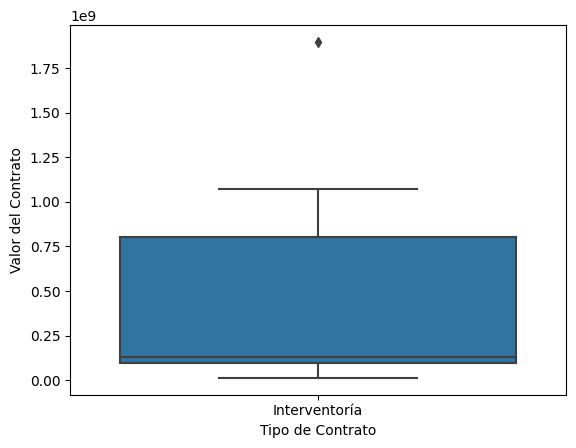

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Interventoría'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(10,10))
# Muestra el boxplot

plt.show()

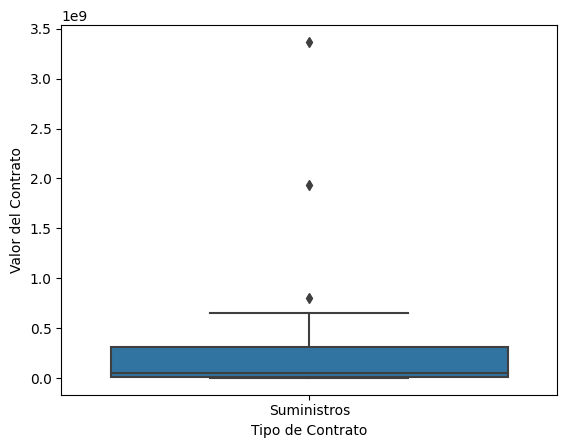

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Suministros'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(10,10))
# Muestra el boxplot

plt.show()

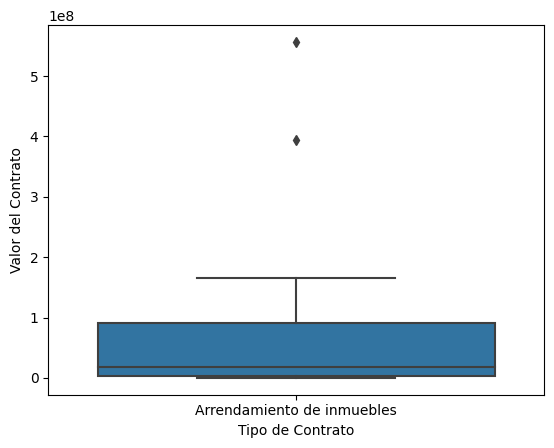

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Arrendamiento de inmuebles'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(10,10))
# Muestra el boxplot

plt.show()

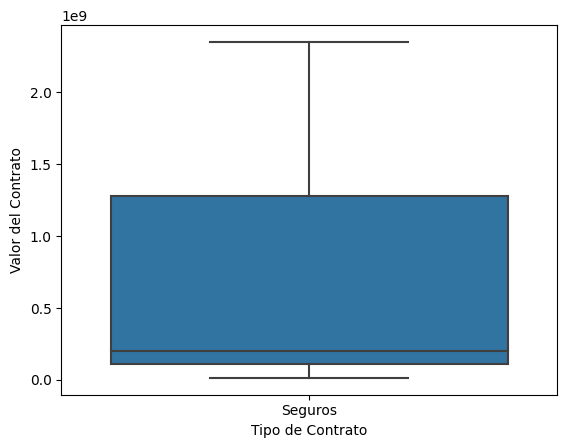

<Figure size 500x600 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Seguros'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(5,6))
# Muestra el boxplot

plt.show()

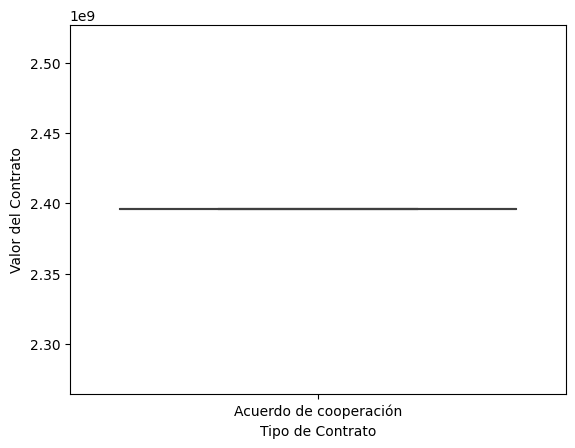

<Figure size 500x600 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Acuerdo de cooperación'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(5,6))
# Muestra el boxplot

plt.show()

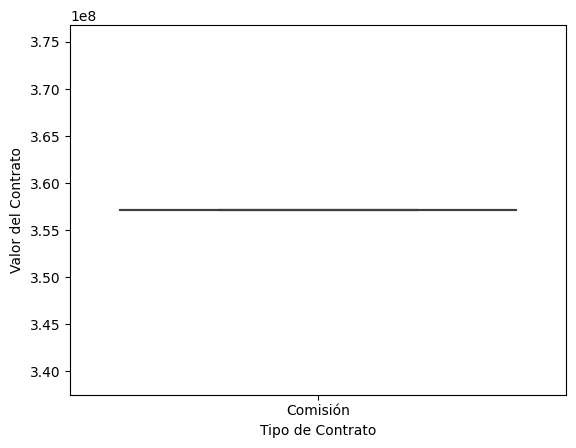

<Figure size 500x600 with 0 Axes>

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df[df['Tipo de Contrato']=='Comisión'])

# Gira los labels del eje x
plt.xticks(rotation=0)
plt.figure(figsize=(5,6))
# Muestra el boxplot

plt.show()

**¿Qué puede analizar con los resultados anteriores?**

Las contrataciones de Licitación pública (1.250920%) y directa con ofertas (3.164091%) representan los valores atipicos mas altos de valor de contratos respectivamente, por lo cual se deberian tener en cuenta otras variables como los terminos de contrato y valor final para el estudio de estas contrataciones.


**Boxplot del Valor de Contrato vs Modalidad de Contratación**

*   Elemento de lista
*   Elemento de lista



In [ ]:
df['Modalidad de Contratacion'].value_counts()

Contratación directa                           1018
Selección abreviada subasta inversa              98
Mínima cuantía                                   77
Contratación Directa (con ofertas)               43
Contratación régimen especial                    39
Concurso de méritos abierto                      35
Selección Abreviada de Menor Cuantía             29
Licitación pública                               17
Contratación régimen especial (con ofertas)       2
Licitación pública Obra Publica                   1
Name: Modalidad de Contratacion, dtype: int64

In [ ]:
df['Modalidad de Contratacion'].value_counts()/len(df)*100

Contratación directa                           74.908021
Selección abreviada subasta inversa             7.211185
Mínima cuantía                                  5.665931
Contratación Directa (con ofertas)              3.164091
Contratación régimen especial                   2.869757
Concurso de méritos abierto                     2.575423
Selección Abreviada de Menor Cuantía            2.133922
Licitación pública                              1.250920
Contratación régimen especial (con ofertas)     0.147167
Licitación pública Obra Publica                 0.073584
Name: Modalidad de Contratacion, dtype: float64

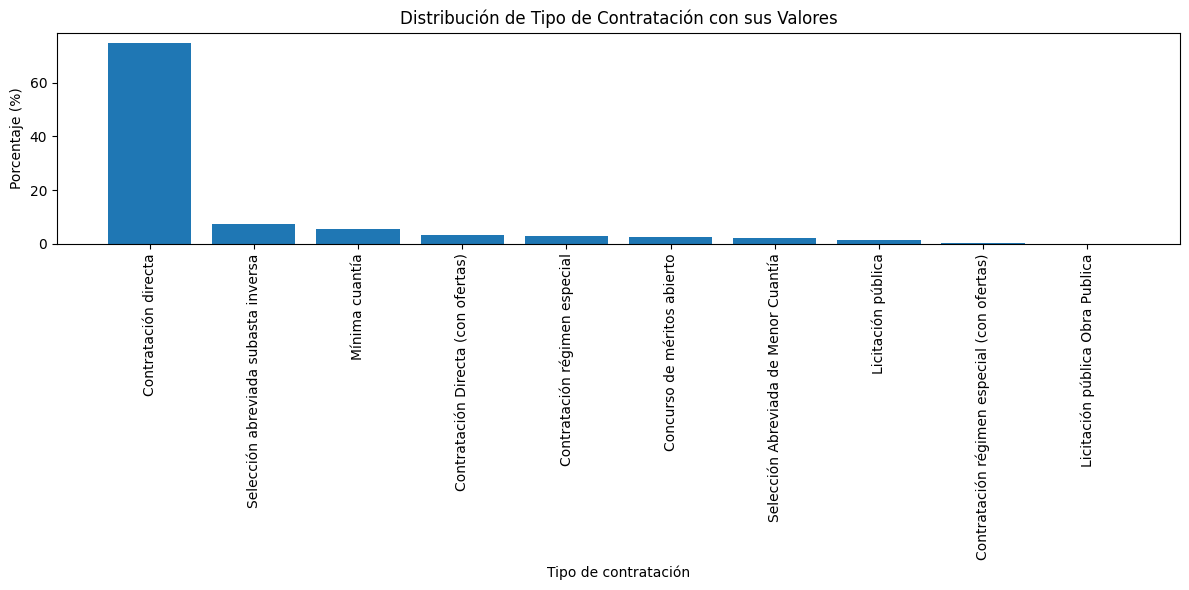

In [ ]:
contract_counts = {
    'Contratación directa': 74.908021,
    'Selección abreviada subasta inversa': 7.211185,
    'Mínima cuantía': 5.665931,
    'Contratación Directa (con ofertas)': 3.164091,
    'Contratación régimen especial': 2.869757,
    'Concurso de méritos abierto': 2.575423,
    'Selección Abreviada de Menor Cuantía': 2.133922,
    'Licitación pública': 1.250920,
    'Contratación régimen especial (con ofertas)': 0.147167,
    'Licitación pública Obra Publica': 0.073584
}

plt.figure(figsize=(12, 6))  # Tamaño del gráfico (opcional)
plt.bar(contract_counts.keys(), contract_counts.values())

plt.xlabel('Tipo de contratación')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución de Tipo de Contratación con sus Valores')

plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()




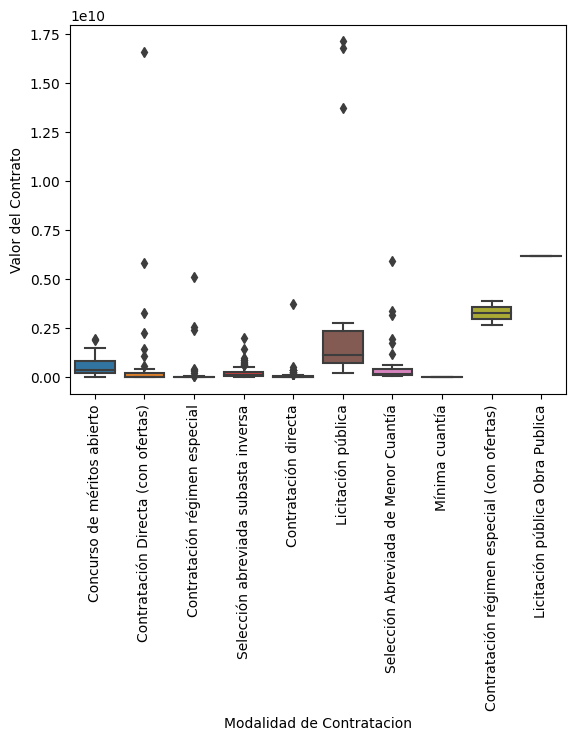

In [ ]:
sns.boxplot(x='Modalidad de Contratacion', y='Valor del Contrato', data=df)

# Gira los labels del eje x
plt.xticks(rotation=90)

# Muestra el boxplot
plt.show()

**¿Qué puede analizar con los resultados anteriores?**

Porcentajes:
- Contratación directa                           74.908021%
- Selección abreviada subasta inversa             7.211185%
- Mínima cuantía                                  5.665931%
- Contratación Directa (con ofertas)              3.164091%
- Contratación régimen especial                   2.869757%
- Concurso de méritos abierto                     2.575423%
- Selección Abreviada de Menor Cuantía            2.133922%
- Licitación pública                              1.250920%
- Contratación régimen especial (con ofertas)     0.147167%
- Licitación pública Obra Publica                 0.073584%

Las contrataciones de Licitación pública (1.250920%) y directa con ofertas (3.164091%) representan los valores atipicos mas altos de valor de contratos respectivamente, por lo cual se deberian tener en cuenta otras variables como los terminos de contrato y valor final.

Mínima cuantía, Contratación régimen especial (con ofertas)  y Licitación pública Obra Publica son los unicos tipos de contratacion que no presentan valores atipicos dentro de la distribución. Pero se debe tener en cuenta que los contratos presentan una distribución asimetrica.

Tambien se observa que el tipo de contratacion mas empleado es la directa con (74.9 %) seguido por Selección abreviada subasta inversa (7.211185%) las cuales presentan valores atipicos moderados con respecto a Las contrataciones de Licitación pública (1.250920%) y directa con ofertas (3.164091%)


**Sobre las variables que resulten de su interés exploren y analicen los resultados obtenidos**

Licitación pública presenta los valores atípicos más altos, junto con la contratación directa. Se debe indagar el porqué de los sobrecostos, por lo cual debemos evaluar si se presentaron errores de implementación, cambio de costos o requerimientos. Además, se debe investigar si se desviaron fondos o el porqué de que sean tan diferenciales algunos de estos contratos.


### Probabilidad y probabilidad condicional

**¿Cual es la probabilidad de obtener un contrato de más de 200 Millones de pesos al seleccionar un contrato al azar?**




In [ ]:
#Probabilidad de obtener al azar un contrato de menos de 200 millones de pesos
# Cuenta la cantidad de registros en la columna 'Valor del contrato'
total_registros = df['Valor del Contrato'].count()
print("El número total de registros es:", total_registros)

# total_registros mayores a 200 millones
registros_mayor_200 = df[df['Valor del Contrato'] >200000000]['Valor del Contrato'].count()
print ('El número total de registros mayores a 200 millones es:',registros_mayor_200)

# Probabilidad
print("La probabilidad es:",registros_mayor_200/total_registros)

El número total de registros es: 1359
El número total de registros mayores a 200 millones es: 122
La probabilidad es: 0.08977189109639441


**¿Cual es la probabilidad de obtener un contrato de más de 200 Millones de pesos al filtrar Modalidad de Contratación, minima cuantía?**

In [ ]:
#Probabilidad de obtener al azar un contrato de más de 200 millones de pesos, cuando sea hace Selección abreviada de Menor Cuantía
# Cuenta la cantidad de registros en la columna 'Valor del contrato'
total_registros_menorcuantia = df[df['Modalidad de Contratacion'] == "Selección Abreviada de Menor Cuantía"]['Valor del Contrato'].count()
print('Total registros de menor cuantía:',total_registros_menorcuantia)

# total_registros mayores a 200 millones pr
contratos_mayor_200_menorcuantia = df.loc[(df['Valor del Contrato'] >200000000) & (df['Modalidad de Contratacion'] == 'Selección Abreviada de Menor Cuantía')]
registros_mayor_200_menorcuantia = contratos_mayor_200_menorcuantia['Valor del Contrato'].count()
print ('Total registros de menor cuantía mayores a 200 millones',registros_mayor_200_menorcuantia)

# Probabilidad
print('La probabilidad es:',registros_mayor_200_menorcuantia/total_registros_menorcuantia)

Total registros de menor cuantía: 29
Total registros de menor cuantía mayores a 200 millones 14
La probabilidad es: 0.4827586206896552


Analice los resultados obtenidos

- El número total de registros es: 1359
- El número total de registros mayores a 200 millones es: 122
- La probabilidad es: 0.08977189109639441

Con esta información se deberian estudiar los 122 contratos que superan los 200 millones ya que son valores atipicos, los cuales se deben estudiar para determinar por que los sobrecostos.

La modalidad de menor cuantía parece tener un número significativo de contratos en general 29 en total. Además, 14 de estos contratos tienen un valor mayor a 200 millones.


### Estimadores

¿Cual es el valor promedio de los contratos considerando todas las modalidades?
¿Cual es la varianza del monto de los contratos?

In [ ]:
# Estimador puntal del promedio
media_contratos = df['Valor del Contrato'].mean()

# Estimador puntual de la varianza
var_contratos = np.var(df['Valor del Contrato'])

# Desviación estándar
desv_contratos  = var_contratos** 0.5

#
display(media_contratos)
display(var_contratos)
display(desv_contratos)

175398530.84694627

9.55602726136502e+17

977549347.1618208

Analice los resultados obtenidos y compare con los resultados obtenidos con la función df.describe() en el análisis de exploración de datos

Media de los contratos es de 175,398,530.85. Esto representa el promedio del valor de todos los contratos en el conjunto de datos.

Varianza de los contratos es de 9.55602726136502e+17. La varianza mide la dispersión de los valores con respecto a la media, y un valor tan grande indica que los valores están muy dispersos.

Desviación estándar de los contratos es de 977,549,347.16 esta es la medida de la dispersión de los valores con respecto a la media. En este caso, la desviación estándar es de aproximadamente 977,549,347.16, lo que confirma que los valores de los contratos tienen una alta dispersión y valores atipicos.


### Intervalos de confianza

Asuma que estos contratos son una muestra aleatoria de los diferentes contratos que se pudo generar. (Tanto la media como la varianza son desconocidas)

Determine el intervalo de confianza para el valor promedio de los contratos.

Cual sería el intervalo de confianza para el monto promedio de los contratos.

In [ ]:
from scipy.stats import t
import numpy as np

# Definir la muestra
n = len(df['Valor del Contrato'])

# Calcular la media muestral y la desviación estándar muestral
media = media_contratos
s = desv_contratos

# Definir el nivel de significancia y los grados de libertad
alpha = 0.05
gl = n - 1

# Calcular el valor crítico de la distribución t
t_critico = t.ppf(1 - alpha / 2, gl)

# Calcular el intervalo de confianza
intervalo = (media - t_critico * s / np.sqrt(n), media + t_critico * s / np.sqrt(n))

print("Intervalo de confianza del 95%:", intervalo)
print("Podemos asegurar con un 95% de confianza que el valor promedio de los contratos para esta entidad está en el rango:", intervalo)

Intervalo de confianza del 95%: (123379255.3312772, 227417806.36261535)
Podemos asegurar con un 95% de confianza que el valor promedio de los contratos para esta entidad está en el rango: (123379255.3312772, 227417806.36261535)


**Analice los resultados obtenidos**

El intervalo de confianza del 95% nos brinda una medida de la incertidumbre en torno al valor promedio de los contratos, y con un 95% de confianza, podemos decir que el valor promedio real se encuentra dentro del rango mencionado.

## Prueba de hipótesis

Con los datos actuales, si se formula la hipótesis nula, el valor promedio de los contratos es igual a 70.000.000, ¿qué podría afirmar?

In [ ]:
# Definir el valor hipotético de la media poblacional
mu0 = 70000000

# Calcular el estadístico de prueba t
t_est = (media - mu0) / (s / np.sqrt(n))

# Calcular los grados de libertad y el valor crítico de t
gl = n - 1
t_critico = t.ppf(1 - 0.05/2, gl)

# Imprimir el resultado de la prueba de hipótesis
if t_est > t_critico or t_est < -t_critico:
    print("Se rechaza H0, la media poblacional es diferente de", mu0)
else:
    print("No se puede rechazar H0, la media poblacional es igual a", mu0)

Se rechaza H0, la media poblacional es diferente de 70000000


**Analice los resultados**

Cuando se menciona que se rechaza H0, la media poblacional es diferente de 70000000. En este caso, la hipótesis nula (H0) establece que la media poblacional es igual a 70000000. lo que significa que se ha encontrado evidencia estadística para afirmar que la media poblacional es diferente de de ese valor ya que es de .

## Conclusiones

•	El valor promedio de los contratos que realiza la alcaldía de Bogotá es de 175.398 millones de pesos.  De manera análoga el percentil 50 o el 50% de los datos de los valores del contrato se encuentran por encima de $38.357 millones de pesos.
•	Este conjunto de datos contiene información sobre cada empresa clasificada como una Pequeña o Mediana Empresa (Pyme) o no. Los datos muestran que la mayoría de las empresas 80.21% no son clasificadas como Pymes, mientras que solo el 19.79% entran en la categoría de Pyme.
•	Este conjunto de datos contiene información sobre si cada empresa forma parte de un grupo o no. Los datos muestran que la mayoría de las empresas con un porcentaje del 98.31% no pertenecen a ningún grupo, mientras que solo el 1.69% son parte de un grupo.
•	Este conjunto de datos proporciona información sobre la distribución de las empresas en diferentes sectores. La mayoría de las empresas se encuentran en el sector de Servicio Público 925 empresas (68.06%), mientras que un número menor se encuentra en el sector de Industria 434 empresas (31,94%).
•	La distribución representada es asimétrica sesgada a la izquierda debido a los valores de contratos iguales a 0. El sesgo negativo se debe a que los valores extremadamente bajos, en este caso los contratos con valor cero, están desplazando la media hacia la izquierda.
•	Este conjunto de datos ofrece información sobre los tipos de contratos en los que están involucradas las empresas. El tipo de contrato más común es "Prestación de servicios", con 1082 empresas utilizando este tipo de contrato. "Compraventa" y "Otro" también son tipos de contrato relativamente comunes, mientras que otros tienen menos ocurrencias.
•	Se debe evaluar los valores atípicos para cada tipo de contratación y evaluar por que se dieron los sobrecostos, determinando el tipo de contrato y el valor del mismo.
•	Se debe tener en cuenta que las contrataciones de Licitación pública (1.250920%) y directa con ofertas (3.164091%) representan los valores atípicos más elevados de valor de contratos respectivamente.
•	Este conjunto de datos proporciona información sobre el estado actual de los contratos. Modificado es el estado de contrato más común con un 58.27%, seguido de Activo 21.33% y Terminado 15.74%. Los estados Cerrado, Cedido y Suspendido tienen menos ocurrencias
